In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [33]:
df=pd.read_csv("Readmissions and Deaths_Hospital.csv",encoding='latin1')

In [15]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [16]:
df.shape

(67452, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
Provider ID             67452 non-null int64
Hospital Name           67452 non-null object
Address                 67452 non-null object
City                    67452 non-null object
State                   67452 non-null object
ZIP Code                67452 non-null int64
County Name             67242 non-null object
Phone Number            67452 non-null int64
Measure Name            67452 non-null object
Measure ID              67452 non-null object
Compared to National    67452 non-null object
Denominator             67452 non-null object
Score                   67452 non-null object
Lower Estimate          67452 non-null object
Higher Estimate         67452 non-null object
Footnote                25742 non-null object
Measure Start Date      67452 non-null object
Measure End Date        67452 non-null object
dtypes: int64(3), object(15)
memory usage: 9.3+ MB


In [18]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National     0.00
Denominator              0.00
Score                    0.00
Lower Estimate           0.00
Higher Estimate          0.00
Footnote                61.84
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [34]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(67452, 17)

In [35]:
df=df.dropna(axis=0, how='any')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


In [36]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [37]:
df=df[~(df["Denominator"].isin(['Not Applicable','Not Available']))]# & (df["Score"].isin(['Not Applicable','Not Available'])) & (df["Lower Estimate"].isin(['Not Applicable','Not Available'])) & (df["Higher Estimate"].isin(['Not Applicable','Not Available']))]

In [38]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null object
Score                   41645 non-null object
Lower Estimate          41645 non-null object
Higher Estimate         41645 non-null object
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: int64(2), object(11)
memory usage: 4.4+ MB


### Converting some categorical variables to numeric

In [40]:
df = df.replace(['Not Available','Not Applicable'],0)

In [42]:
df[["Denominator","Score","Lower Estimate","Higher Estimate"]] = df[["Denominator","Score","Lower Estimate","Higher Estimate"]].apply(pd.to_numeric,errors='coerce')


In [43]:
df=df.fillna(0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null int64
Score                   41645 non-null float64
Lower Estimate          41645 non-null float64
Higher Estimate         41645 non-null float64
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 4.4+ MB


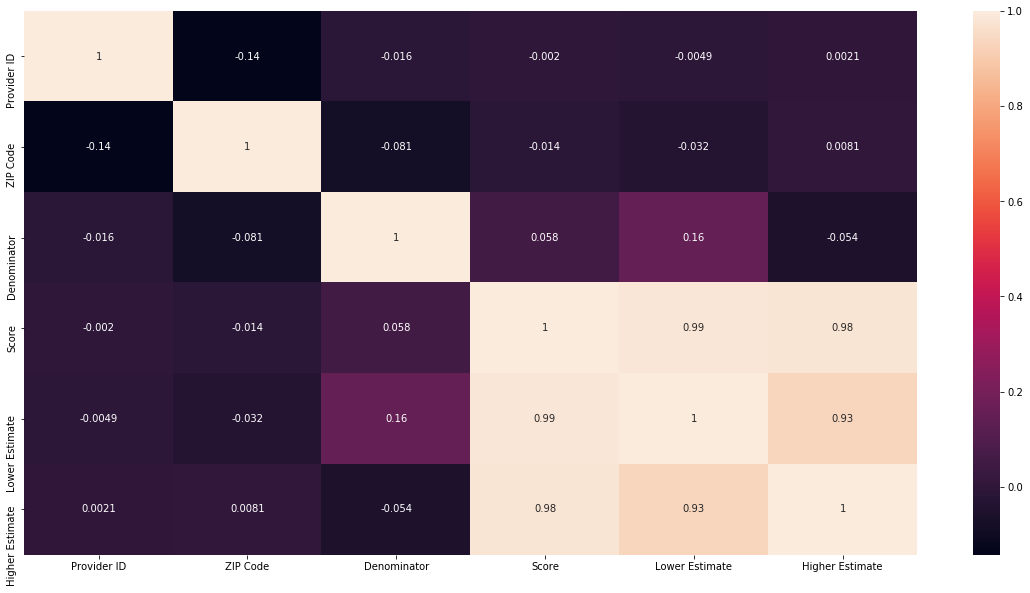

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [46]:
## Droppng Columns with high correlation -
df = df.drop(['Lower Estimate', 'Higher Estimate'], axis=1)

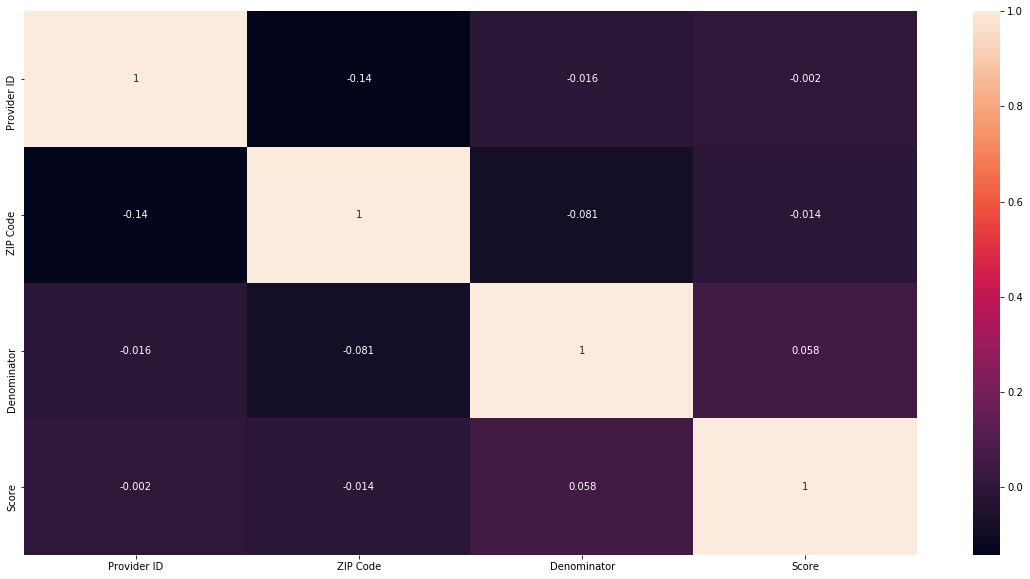

In [47]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [48]:
df.to_csv('Readmissions and Deaths.csv')

In [49]:
RnDeaths = df[:]
RnDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 11 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null int64
Score                   41645 non-null float64
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB


In [106]:
Mort_read_df = pd.read_csv(r'C:\Users\Preethi\Downloads\Cleaned files (2)\Cleaned files\Readmissions and Deaths.csv', index_col = 0)

In [107]:
Mort_read_df.drop(['Hospital Name','ZIP Code','Measure Name','County Name','Compared to National','Denominator','Measure Start Date','Measure End Date'],axis=1,inplace=True)

In [108]:
Mortality_df = Mort_read_df[Mort_read_df['Measure ID'].str.contains("MORT")]

In [109]:
Mortality_df['Measure ID'].unique()

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK'], dtype=object)

In [110]:
# Another feature for Mortality ie 'Death Among Surgical Patients with Serious Treatable Complications' is captured from Complications- Hospital csv.
MORT_30_DASdf = pd.read_csv(r'C:\Users\Preethi\Downloads\Hospital_Revised_FlatFiles_20161110\Complications - Hospital.csv')

In [111]:
MORT_30_DASdf = MORT_30_DASdf[MORT_30_DASdf['Measure ID']== 'PSI_4_SURG_COMP']
MORT_30_DASdf.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Denominator', 'Score', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')

In [112]:
MORT_30_DASdf.drop(['Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name','Compared to National', 'Denominator', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],axis=1,inplace=True)

In [113]:
MORT_30_DASdf.head()

,Provider ID,Measure ID,Score
6,10001,PSI_4_SURG_COMP,168.26
17,10005,PSI_4_SURG_COMP,179.05
28,10006,PSI_4_SURG_COMP,198.33
39,10007,PSI_4_SURG_COMP,Not Available
50,10008,PSI_4_SURG_COMP,Not Available


In [114]:
MORT_30_DASdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 6 to 52993
Data columns (total 3 columns):
Provider ID    4818 non-null int64
Measure ID     4818 non-null object
Score          4818 non-null object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [115]:
MORT_30_DASdf = MORT_30_DASdf.replace(['Not Available','Not Applicable'],0)

In [116]:
MORT_30_DASdf.shape

(4818, 3)

In [117]:
MORT_30_DASdf[MORT_30_DASdf['Score']==0].count()

Provider ID    3000
Measure ID     3000
Score          3000
dtype: int64

### As PSI_4_SURG_COMP measure have very less number of hospitals, not adding it to Mortality group.

In [118]:
#Loading coefficients of Mortality measures are the following, MORT_30_PN=0.66,MORT_30_AMI=0.48, 
#'MORT_30_CABG'=0.35, 'MORT_30_COPD'= 0.62, 'MORT_30_HF'= 0.74, 'MORT_30_STK'=0.52
# Hence multiplying the respective feature scores with their loading coefficient.

In [119]:
Mortality_df.head()

,Provider ID,Measure ID,Score
0,10001,MORT_30_AMI,12.5
1,10001,MORT_30_CABG,4.2
2,10001,MORT_30_COPD,9.3
3,10001,MORT_30_HF,12.4
4,10001,MORT_30_PN,15.5


In [120]:
Mortality_df=Mortality_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
Mortality_df.reset_index(inplace=True)
Mortality_df = Mortality_df.rename_axis(None)
Mortality_df.head()

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK
0,10001,12.5,4.2,9.3,12.4,15.5,15.4
1,10005,16.0,NaN,7.6,15.5,20.8,15.5
2,10006,16.7,4.1,7.1,15.6,18.2,17.9
3,10007,NaN,NaN,9.3,14.4,18.8,16.6
4,10008,NaN,NaN,8.2,12.7,15.7,NaN


In [121]:
print(Mortality_df.columns)
print(Mortality_df.shape)

Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK'],
      dtype='object', name='Measure ID')
(4112, 7)


In [122]:
round((Mortality_df.isnull().sum()/Mortality_df.isnull().count())*100,2)

Measure ID
Provider ID      0.00
MORT_30_AMI     42.02
MORT_30_CABG    74.76
MORT_30_COPD    12.79
MORT_30_HF      12.14
MORT_30_PN       0.75
MORT_30_STK     35.02
dtype: float64

In [123]:
Mortality_df.fillna(0, inplace=True)

In [124]:
round((Mortality_df.isnull().sum()/Mortality_df.isnull().count())*100,2)

Measure ID
Provider ID     0.0
MORT_30_AMI     0.0
MORT_30_CABG    0.0
MORT_30_COPD    0.0
MORT_30_HF      0.0
MORT_30_PN      0.0
MORT_30_STK     0.0
dtype: float64

In [125]:
Mortality_df['MORT_30_PN'] = Mortality_df['MORT_30_PN']*0.66
Mortality_df['MORT_30_AMI']= Mortality_df['MORT_30_AMI']*0.48
Mortality_df['MORT_30_CABG']= Mortality_df['MORT_30_CABG']*0.35
Mortality_df['MORT_30_COPD']= Mortality_df['MORT_30_COPD']*0.62
Mortality_df['MORT_30_HF']= Mortality_df['MORT_30_HF']*0.74
Mortality_df['MORT_30_STK']= Mortality_df['MORT_30_STK']*0.52

In [130]:
Mortality_df['Mort_score'] = ((Mortality_df['MORT_30_AMI']+Mortality_df['MORT_30_CABG']+Mortality_df['MORT_30_COPD']+Mortality_df['MORT_30_HF']+Mortality_df['MORT_30_STK']+Mortality_df['MORT_30_PN'])/6)

In [131]:
Mortality_df.head()

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,Mort_score
0,10001,6.000,1.470,5.766,9.176,10.230,8.008,6.775000
1,10005,7.680,0.000,4.712,11.470,13.728,8.060,7.608333
2,10006,8.016,1.435,4.402,11.544,12.012,9.308,7.786167
3,10007,0.000,0.000,5.766,10.656,12.408,8.632,6.243667
4,10008,0.000,0.000,5.084,9.398,10.362,0.000,4.140667
